In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import os

In [4]:
from typing import Dict
import itertools


In [5]:
import time

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

### 현재 위치 파일들 확인

In [24]:
os.listdir('.')

['.config', 'data', '.ipynb_checkpoints', 'sample_data']

In [25]:
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

d_code = pd.read_csv('./data/속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('./data/속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('./data/속성_L_코드.csv', index_col=0).T.to_dict()

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

df_train = add_code(df_train, d_code, h_code, l_code)
df_test = add_code(df_test, d_code, h_code, l_code)

df_train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


In [26]:
df_train.shape

(501951, 63)

In [27]:
df_train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016



### 데이터셋 컬럼 정제하기

#### 전처리 쉽게하기 위해 train,test 합치기

In [28]:
df_test['target'] = ''

df_train['isTrain'] = True
df_test['isTrain'] = False

data_all = pd.concat([df_train, df_test])

In [29]:
print(df_train.shape, df_test.shape)

(501951, 64) (46404, 64)


In [30]:
data_all.isna().sum().sum()

0

In [31]:
cols_to_drop = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', ]

In [32]:
data_all = data_all.drop(cols_to_drop, axis=1)

In [33]:
data_all.shape

(548355, 58)

# What to do 
- 이상치 제거
- 필요없는 변수 제거
- 변수중요도 확인(permutation)

## Model

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train = data_all[data_all['isTrain']==True]
test = data_all[data_all['isTrain']==False]

In [37]:
## 필요없어 보이는 column 제거
cols_to_drop_train = ['id','isTrain','person_rn', 'contents_rn', 'contents_open_dt','target',]

In [38]:
train_X = train.drop(cols_to_drop_train, axis=1)

In [39]:
train_y = train['target'].astype(int)

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size = 0.3, random_state = 1990)

### RF

In [41]:
rf_model = RandomForestClassifier(n_estimators=200, )

In [42]:
start_time = time.time()
rf_model.fit(X_train, y_train)
f"Model fitting took : { (time.time()-start_time) / 60} "

'Model fitting took : 334.76884484291077 / 60'

In [43]:
result_valid = rf_model.predict(X_valid)

In [53]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [54]:
f1_score(y_valid, result_valid)

0.6249529373580006

In [55]:
df_cm = confusion_matrix(y_valid, result_valid)

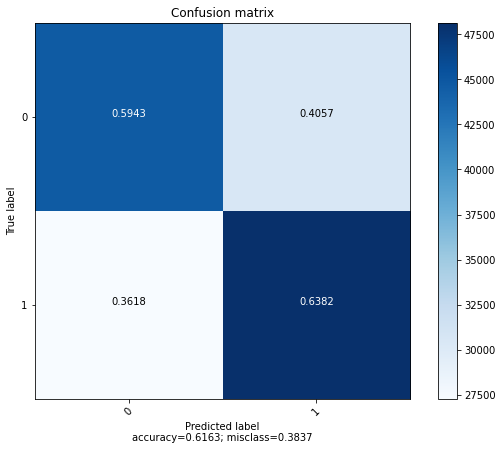

In [56]:
plot_confusion_matrix(df_cm, [0,1])

## Permutation importance 확인하기

In [ ]:
import eli5 
from eli5.sklearn import PermutationImportance 
perm = PermutationImportance(rf_model, scoring = "f1", random_state = 42).fit(X_valid, y_valid) 
eli5.show_weights(perm, top = 80, feature_names = X_valid.columns.tolist())



Weight,Feature
0.0560 ± 0.0004,contents_attribute_d
0.0450 ± 0.0014,contents_attribute_d_n
0.0347 ± 0.0012,contents_attribute_d_s
0.0247 ± 0.0008,contents_attribute_d_m
0.0195 ± 0.0012,contents_attribute_d_l
0.0177 ± 0.0010,contents_attribute_h
0.0170 ± 0.0005,contents_attribute_h_m
0.0109 ± 0.0006,person_prefer_d_1_n
0.0101 ± 0.0010,person_prefer_d_1
0.0081 ± 0.0014,contents_attribute_l


In [94]:
# 컬럼별 importance check & 0 미만 제거
result = [(x[0], x[1], x[2]) for x in zip(perm.feature_importances_, perm.feature_importances_std_, X_valid.columns)]
result.sort(key=lambda x: x[0], reverse=True)
col_to_delete_perm = []
for i in result:
  if i[0] <= 0.001 :
    print(i[2])
    col_to_delete_perm.append(i[2])

person_prefer_g
contents_attribute_l_l
person_prefer_h_1_l
person_prefer_h_1_m
person_attribute_a


### 컬럼 제거

In [95]:
col_to_delete_perm

['person_prefer_g',
 'contents_attribute_l_l',
 'person_prefer_h_1_l',
 'person_prefer_h_1_m',
 'person_attribute_a']

In [96]:
train = data_all[data_all['isTrain']==True]
test = data_all[data_all['isTrain']==False]

In [97]:
## 필요없어 보이는 column 제거
cols_to_drop_train = ['id','isTrain','person_rn', 'contents_rn', 'contents_open_dt','target',] + col_to_delete_perm

In [98]:
train_X = train.drop(cols_to_drop_train, axis=1)

In [99]:
train_y = train['target'].astype(int)

In [100]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size = 0.3, random_state = 1990)

### RF

In [101]:
rf_model = RandomForestClassifier(n_estimators=200, )

In [102]:
start_time = time.time()
rf_model.fit(X_train, y_train)
f"Model fitting took : { (time.time()-start_time) / 60}mins "

'Model fitting took : 5.10527906815211mins '

In [103]:
result_valid = rf_model.predict(X_valid)

In [104]:
f1_score(y_valid, result_valid)

0.6250997023520027

In [105]:
df_cm = confusion_matrix(y_valid, result_valid)

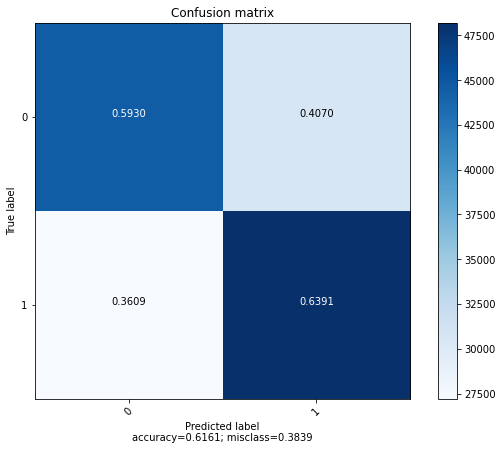

In [106]:
plot_confusion_matrix(df_cm, [0,1])

In [107]:
# testset

In [108]:
test_drop = test.drop(cols_to_drop_train, axis=1)

In [112]:
prediction_test = rf_model.predict(test_drop)

In [113]:
prediction_test.shape

(46404,)

In [114]:
submission = pd.read_csv("./data/sample_submission.csv")

In [116]:
submission['target'] = prediction_test

In [117]:
submission.to_csv("./submission.csv", index=False)